In [17]:
import pandas as pd 
import numpy as np
import json

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

import descriptors.preprocessing as pp
import descriptors.dft_featurisation as dft_ft
import descriptors.rdkit_featurisation as rdkit_ft
from analysis import analysis_train_set_size, random_split, stratified_split 

from rdkit import Chem

In [18]:
estimators = [('predictor', RandomForestRegressor())]
pipe = Pipeline(estimators)
metric = r2_score

In [19]:
df_dft = pd.read_csv("data/NiCOlit.csv", sep = ',')
df_dft = pp.preprocess(df_dft)
indexes_kept_dft = np.array(df_dft.index)
X_dft, y_dft, DOI_dft, mechanisms_dft, origins_dft, sub_dft, lig_dft = dft_ft.process_dataframe_dft(df_dft, data_path="data/utils/", origin=False)

In [21]:
# TODO: clean 
r2 = []
length = []
for sub in np.unique(sub_dft):
    indexes = np.where(sub_dft==sub)[0]
    values, baseline_values, model_values, stratification_values, additional_stratification_values = random_split(X_dft[indexes, :], y_dft[indexes], origins_dft[indexes], sub_dft[indexes], n_iterations=100)
    print(sub)
    print(len(indexes))
    print(round(r2_score(values, model_values), 3))
    r2.append(round(r2_score(values, model_values), 3))
    length.append(len(indexes))

OAc
72
0.404
OC(=O)N
215
0.345
OC(=O)O
82
0.64
OCH3
546
0.569
OCOC
17
-0.391
OPh
3
-1.336
OPiv
394
0.556
OSi(C)(C)C
23
-0.254
Otriazine
54
0.391


In [22]:
values, baseline_values, model_values, stratification_values, additional_stratification_values = random_split(X_dft, y_dft, origins_dft, sub_dft, n_iterations=100)
R2_scores_full = []
for sub in np.unique(sub_dft):
    indexes = np.where(np.array(additional_stratification_values)==sub)[0]
    print(sub)
    print(round(r2_score(np.array(values)[indexes], np.array(model_values)[indexes]),3))
    R2_scores_full.append(round(r2_score(np.array(values)[indexes], np.array(model_values)[indexes]),3))
# resulting in 14100 values for 50 iterations

OAc
0.356
OC(=O)N
0.408
OC(=O)O
0.663
OCH3
0.554
OCOC
0.063
OPh
-0.3
OPiv
0.55
OSi(C)(C)C
-0.254
Otriazine
0.413


In [24]:
print(np.unique(sub_dft))
print(r2)
print(R2_scores_full)

['OAc' 'OC(=O)N' 'OC(=O)O' 'OCH3' 'OCOC' 'OPh' 'OPiv' 'OSi(C)(C)C'
 'Otriazine']
[0.404, 0.345, 0.64, 0.569, -0.391, -1.336, 0.556, -0.254, 0.391]
[0.356, 0.408, 0.663, 0.554, 0.063, -0.3, 0.55, -0.254, 0.413]


In [33]:
df_dft['substrate_class'] = sub_dft
for sub in np.unique(sub_dft):
    indexes = np.where(sub_dft==sub)[0]
    print(sub, ":\n","DOIs:", len(np.unique(DOI_dft[indexes])),
                                       "\n A-X:", len(np.unique(mechanisms_dft[indexes])),
         ":\n","n_reactions:", len(np.where(df_dft.substrate_class==sub)[0]))
    
for sub in np.unique(sub_dft):
    indexes = np.where(sub_dft==sub)[0]
    

OAc :
 DOIs: 7 
 A-X: 5 :
 n_reactions: 72
OC(=O)N :
 DOIs: 14 
 A-X: 8 :
 n_reactions: 215
OC(=O)O :
 DOIs: 4 
 A-X: 2 :
 n_reactions: 82
OCH3 :
 DOIs: 11 
 A-X: 6 :
 n_reactions: 546
OCOC :
 DOIs: 4 
 A-X: 2 :
 n_reactions: 17
OPh :
 DOIs: 3 
 A-X: 3 :
 n_reactions: 3
OPiv :
 DOIs: 12 
 A-X: 7 :
 n_reactions: 394
OSi(C)(C)C :
 DOIs: 5 
 A-X: 3 :
 n_reactions: 23
Otriazine :
 DOIs: 1 
 A-X: 1 :
 n_reactions: 54


In [32]:
np.where(df_dft.substrate_class==sub)

array([102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157])

In [27]:
df_dft.columns

Index(['substrate', 'coupling_partner', 'effective_coupling_partner',
       'solvent', 'time', 'temperature', 'catalyst_precursor', 'reagents',
       'effective_reagents', 'effective_reagents_covalent', 'reductant',
       'ligand', 'effective_ligand', 'product', 'analytical_yield',
       'isolated_yield', 'coupling_partner_class', 'DOI', 'origin',
       'eq_substrate', 'eq_coupling_partner', 'eq_catalyst', 'eq_ligand',
       'eq_reagent', '2_steps', 'scheme_table', 'review', 'Mechanism',
       'Lewis Acid'],
      dtype='object')

In [7]:
np.unique(sub_dft)

array(['OAc', 'OC(=O)N', 'OC(=O)O', 'OCH3', 'OCOC', 'OPh', 'OPiv',
       'OSi(C)(C)C', 'Otriazine'], dtype=object)

In [14]:
sub = 'OSi(C)(C)C'
indexes = np.where(sub_dft==sub)[0]
smis = np.unique(df_dft.substrate[indexes])
print(len(smis))

12


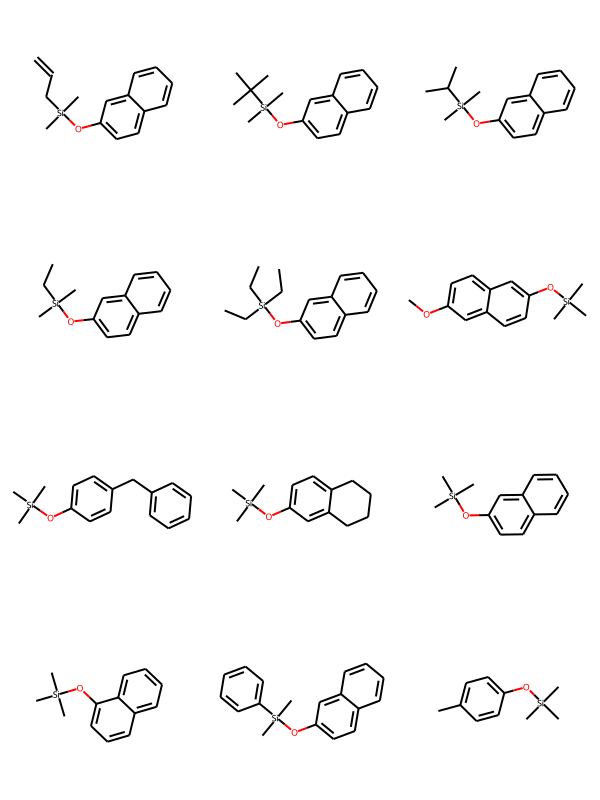

In [15]:
from rdkit.Chem import Draw
from rdkit import Chem
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in smis], maxMols=500)

In [16]:
DOIs = np.unique(df_dft.DOI[indexes])
DOIs

array(['https://doi.org/10.1002/anie.200453765',
       'https://doi.org/10.1002/chem.201003731',
       'https://doi.org/10.1002/chem.201603436',
       'https://doi.org/10.1021/acs.orglett.6b02656',
       'https://doi.org/10.1039/B718998B'], dtype=object)

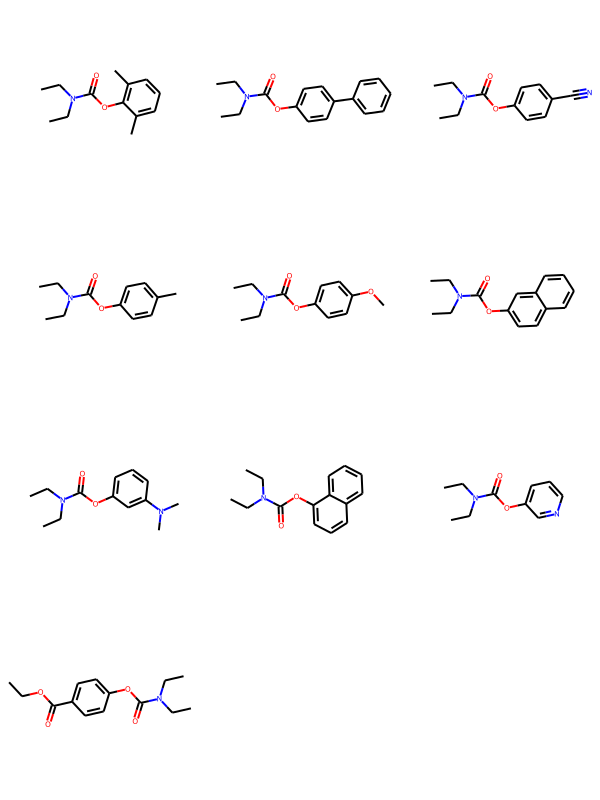

In [15]:
doi = 'https://doi.org/10.1021/jo1024464'
dois_indexes = np.where(df_dft.DOI == doi)[0]
smis = np.unique(df_dft.substrate[dois_indexes])
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in smis])